# D212 Data Mining II Performance Assessment Task 1
By Matthew Heino

### Purpose:
This is a Jupyter Notebook for the D212 assessment for Data Mining II.  This notebook will be used in conjunction with a written document to create a hierarchical cluster model.  Concepts that will be explored in this notebook will be:
- Creation of a hierarchical clustering model
- Data preparation 
- Data transformation, transforming data into a form that can be used in a hierarchical clustering model.

**Note:** Code that has references uses the APA citation can be found in the Word document that accompanies this Jupyter Notebook.

## Pre-assessment tasks:
        
        1. Read the data from the CSV.
        2. Get a feel for what the data contains. Print the first five 
        rows of the data frame.
        3. Print some information about the dataframe. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

# Show all columns.
pd.set_option('display.max_columns', None)

Read in the data from the CSV file.
Read on only the columns that will be used to create the clustering model.

In [2]:
# Read in the data from the CSV file.
# Read on only the columns that will be used to create the clustering model.

# Read in only the columns that are required for the assessment.
feature_cols = {'Item1', 'Item2','Item3', 'Item4', 'Item5'
                ,'Item6', 'Item7', 'Item8' } 

medical_df = pd.read_csv('medical_clean.csv', usecols=feature_cols)

medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Item1   10000 non-null  int64
 1   Item2   10000 non-null  int64
 2   Item3   10000 non-null  int64
 3   Item4   10000 non-null  int64
 4   Item5   10000 non-null  int64
 5   Item6   10000 non-null  int64
 6   Item7   10000 non-null  int64
 7   Item8   10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


## Sections A and B can be found in the written document.  
# C1. Data preparation 
**Note:**  There will be minimal data preparation used in this assessment.  The data that was provided by the university is in a good enough state to be used to create the desired hierarchical model. The only items that will be changed will be the names of the columns and the data types of the survey columns. The reason for this will be explained in the Word document.    

### Step 1: Change the column names to make it easier to understand.

In [3]:
# Step 1. Change the names to something more informative.

# Change the column names to more informative names
col_names = {'Item1' : 'timely_admis_surv', 'Item2' :'timely_treatment_surv' 
             ,'Item3' :'timely_visits_surv' , 'Item4': 'reliability_surv' 
             , 'Item5' : 'options_surv','Item6' : 'hours_of_treatment_surv'
             , 'Item7' : 'courteous_staff_surv'
             , 'Item8' : 'active_listening_surv' } 

# Rename the columns using the dictionary.
# Renaming the columns will happen inplace. (Awan, 2022)
medical_df.rename(columns=col_names, inplace=True)

# Print the column names to check.
medical_df.columns

Index(['timely_admis_surv', 'timely_treatment_surv', 'timely_visits_surv',
       'reliability_surv', 'options_surv', 'hours_of_treatment_surv',
       'courteous_staff_surv', 'active_listening_surv'],
      dtype='object')

### Step 2: Change the column ranking to make it more intuitive.
The next step is to change the scale so that it reflects a more intuitive one.  The current scale ranks the survey answers in a counter-intuitive manner.  This will be changed to make it more acceptable.

In [4]:
# Step 2. Change the Column Ranking
# Change the scale to make it reversed so it ranks the surveys in the a 
# more intuitive manner. These will be remapped in the following manner.
# (pandas.Series.map — Pandas 2.1.4 Documentation, n.d.)

survey_map ={1 : 8, 2 : 7, 3 : 6, 4 : 5, 5 : 4, 6 : 3, 7 : 2, 8 : 1}

# Map the columns to the columns new values.
medical_df['timely_admis_surv'] = medical_df['timely_admis_surv'].map(survey_map)
medical_df['timely_treatment_surv'] = medical_df['timely_treatment_surv'].map(survey_map)
medical_df['timely_visits_surv'] = medical_df['timely_visits_surv'].map(survey_map)
medical_df['reliability_surv'] = medical_df['reliability_surv'].map(survey_map)
medical_df['options_surv'] = medical_df['options_surv'].map(survey_map)
medical_df['hours_of_treatment_surv'] = medical_df['hours_of_treatment_surv'].map(survey_map)
medical_df['courteous_staff_surv'] = medical_df['courteous_staff_surv'].map(survey_map)
medical_df['active_listening_surv'] = medical_df['active_listening_surv'].map(survey_map)

# Check to see that the columns have been reordered/remapped. 
medical_df.head().T

,0,1,2,3,4
timely_admis_surv,6,6,7,6,7
timely_treatment_surv,6,5,5,4,8
timely_visits_surv,7,6,5,4,6
reliability_surv,7,5,5,6,6
options_surv,5,5,6,5,4
hours_of_treatment_surv,6,5,5,4,6
courteous_staff_surv,6,6,6,4,5
active_listening_surv,5,6,6,4,6


# Get some statistical information about the contents of the data frame.

This is performed to see what the statistics look like for the information within the dataframe.
This will answer the question as to whethere any further preparation will be needed.  Will it need to be nomalized or standardized?  It is unlikely since this data is very normally distiributed.  It is expected that this data has not changed since previous assessments.  

In [5]:
# Get some statistical information about the contents of the data frame
medical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
timely_admis_surv,10000.0,5.4812,1.031966,1.0,5.0,5.0,6.0,8.0
timely_treatment_surv,10000.0,5.4933,1.034825,2.0,5.0,6.0,6.0,8.0
timely_visits_surv,10000.0,5.4889,1.032755,1.0,5.0,5.0,6.0,8.0
reliability_surv,10000.0,5.4849,1.036282,2.0,5.0,5.0,6.0,8.0
options_surv,10000.0,5.5031,1.030192,2.0,5.0,6.0,6.0,8.0
hours_of_treatment_surv,10000.0,5.4775,1.032376,2.0,5.0,5.0,6.0,8.0
courteous_staff_surv,10000.0,5.5060,1.021405,2.0,5.0,6.0,6.0,8.0
active_listening_surv,10000.0,5.4903,1.042312,2.0,5.0,6.0,6.0,8.0


The data that is contained within the dataframe is in no need to be processed any further.  The standard deviation is approximately 1 and the data does not seem to exhibit any major outliers. Most of the data will be within the expected range.

Display a simple pandas boxplot to show where the data falls.

<AxesSubplot:>

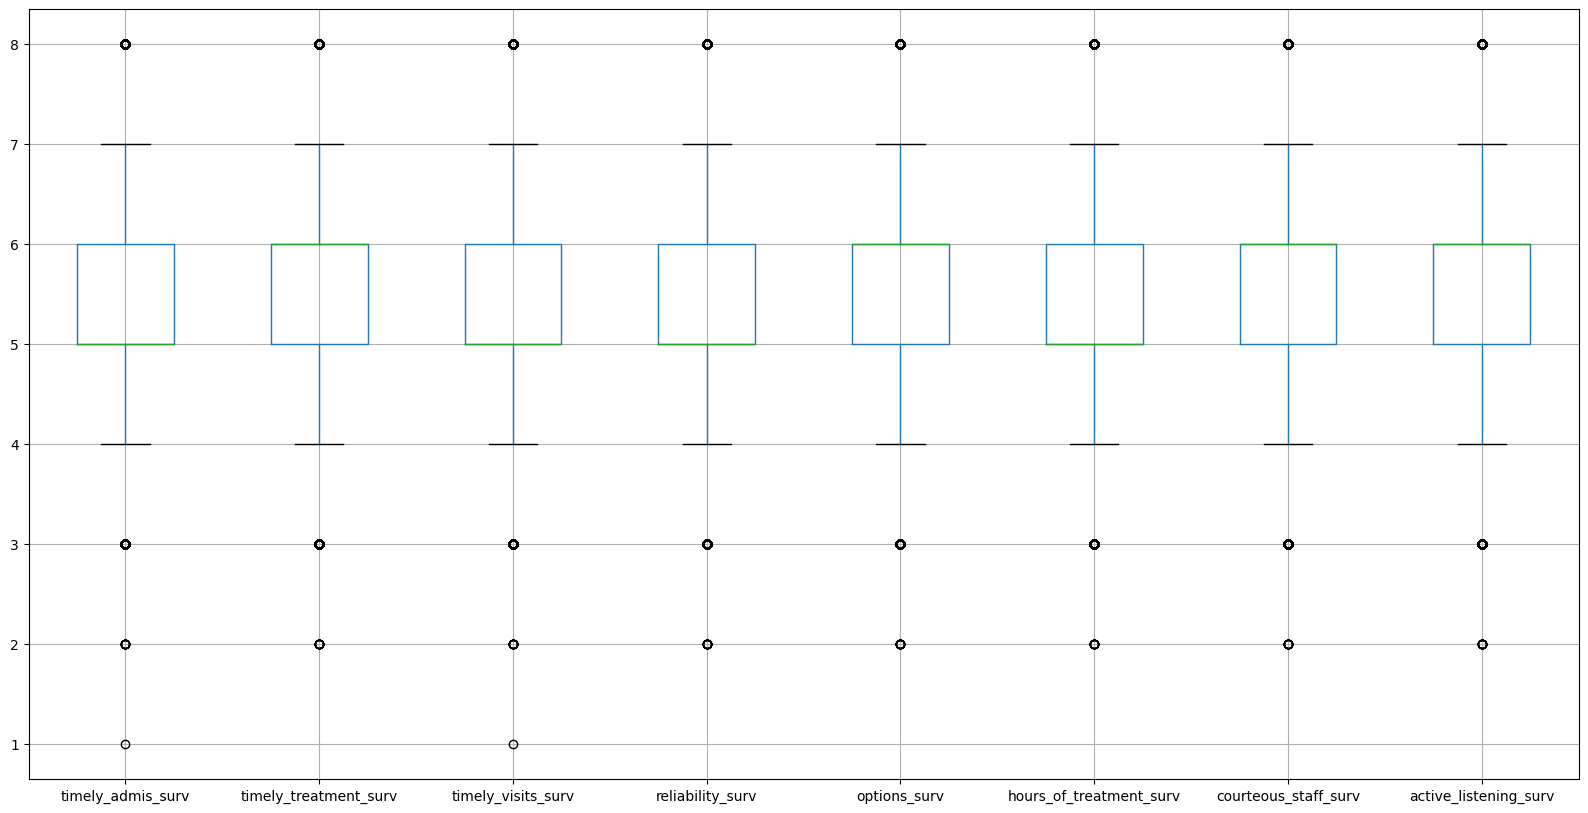

In [6]:
medical_df.boxplot(column=medical_df.columns.tolist(), figsize=(20, 10))

# C4. The Prepared dataset.

Output the prepared Dataset. **Note:** There was no further preparation of the data.

In [7]:
# The outputting the prepared dataset. 
# Save the cleaned dataframe to a CSV file.

medical_df.to_csv('Heino_cleaned_medical_task1.csv', index = False, header = True)

The cleaned data file can be found with this submission.  Additional information can be found in the written document that accompanies this Jupyter Notebook.

# D1. Data Analysis
The data analysis that was performed utilized a hierarchical clustering technique which will be covered in various parts of Section D of this portion of the assessment.  Additional information will be found in the written document that accompanies this submission.

**Note:** This section covers both D1 and D2 of the assessment.

To create the clustering model. This model will be created using the linkage 
function located in the scipy.cluster.hierarchy library.  

# # D1. and D2. Create an initial linkage model. 
Will be using linkage for the creating the array that has the distances for the datapoints that are in the dataframe.


In [8]:
#Create the linkage which returns an array.
ward_matrix_arr = linkage(medical_df, method='ward', metric='euclidean')

### Check to see the other silhouette scores for the different number of clusters.

In [9]:
# Create a range of number for theclusters.
cluster_number = range(2, 12, 1)
num_lst =[]
score_lst = []
cluster_lbs_df = pd.DataFrame()

for clu in cluster_number:
    cluster_lbs_df["Cluster Labels"] = fcluster(ward_matrix_arr, clu
                                                , criterion='maxclust')
    
    # Code using a 't=clu' seems to create the same outcome.
    # Included here for future reference.
    #cluster_lbs_df["Cluster Labels"] = fcluster(ward_matrix_arr,t=clu
    #                                          , criterion='maxclust')
    
    print(cluster_lbs_df["Cluster Labels"].value_counts().sort_index().T)
    cluster_sers = cluster_lbs_df["Cluster Labels"]
    cluster_model_score = silhouette_score(medical_df, cluster_sers
                                           , metric='euclidean')
    num_lst.append(clu)
    score_lst.append(cluster_model_score)

1    4105
2    5895
Name: Cluster Labels, dtype: int64
1    4105
2    1897
3    3998
Name: Cluster Labels, dtype: int64
1    4105
2    1897
3    1311
4    2687
Name: Cluster Labels, dtype: int64
1    2827
2    1278
3    1897
4    1311
5    2687
Name: Cluster Labels, dtype: int64
1    2827
2    1278
3    1897
4    1311
5     613
6    2074
Name: Cluster Labels, dtype: int64
1    2827
2     545
3     733
4    1897
5    1311
6     613
7    2074
Name: Cluster Labels, dtype: int64
1    2827
2     545
3     733
4     594
5    1303
6    1311
7     613
8    2074
Name: Cluster Labels, dtype: int64
1    1380
2    1447
3     545
4     733
5     594
6    1303
7    1311
8     613
9    2074
Name: Cluster Labels, dtype: int64
1     1380
2     1447
3      545
4      733
5      594
6     1303
7      726
8      585
9      613
10    2074
Name: Cluster Labels, dtype: int64
1     1380
2     1447
3      545
4      733
5      594
6      507
7      796
8      726
9      585
10     613
11    2074
Name: Cluster 

###  Create a line plot of the other silhouette scores for comparison.
This was done out of curiosity to see if the there were other possible candidates for the number of clusters for the hierarchy.

In [10]:
# Create a pandas dataframe with the lists.
scores_df = pd.DataFrame(list(zip(num_lst, score_lst))
                         , columns=["Number of Clusters","Silhouette Score"])

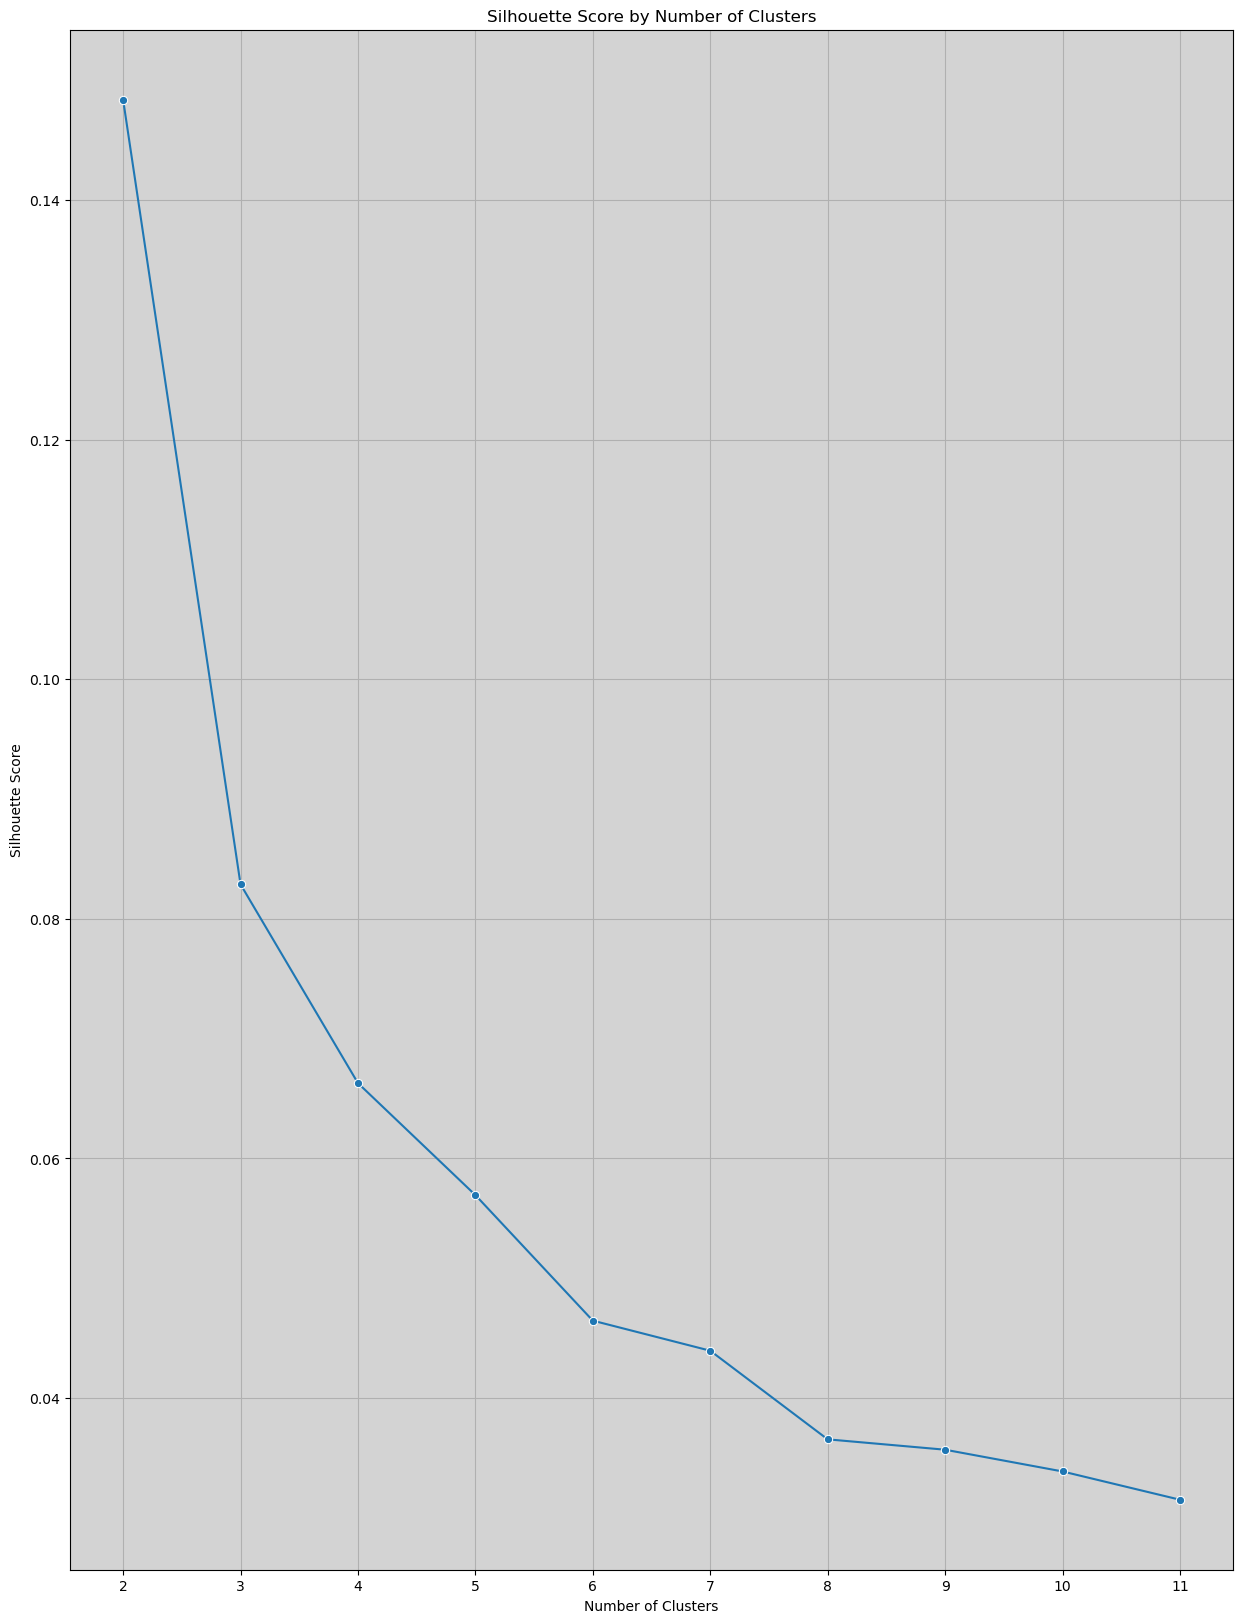

In [11]:
# Create a line plot using seaborn.
fig, ax = plt.subplots(figsize=(15,20))
sns.lineplot(x ="Number of Clusters", y="Silhouette Score",data=scores_df
             ,marker='o', ax=ax )
ax.set(title="Silhouette Score by Number of Clusters")
ax.set_xticks(range(2,12,1))
ax.set_facecolor("lightgray")
plt.grid()
plt.show()

## Visualize the model using a dendrogram. (tree visual).

**Note:** This section of the notebook can take between two to three minutes to complete.

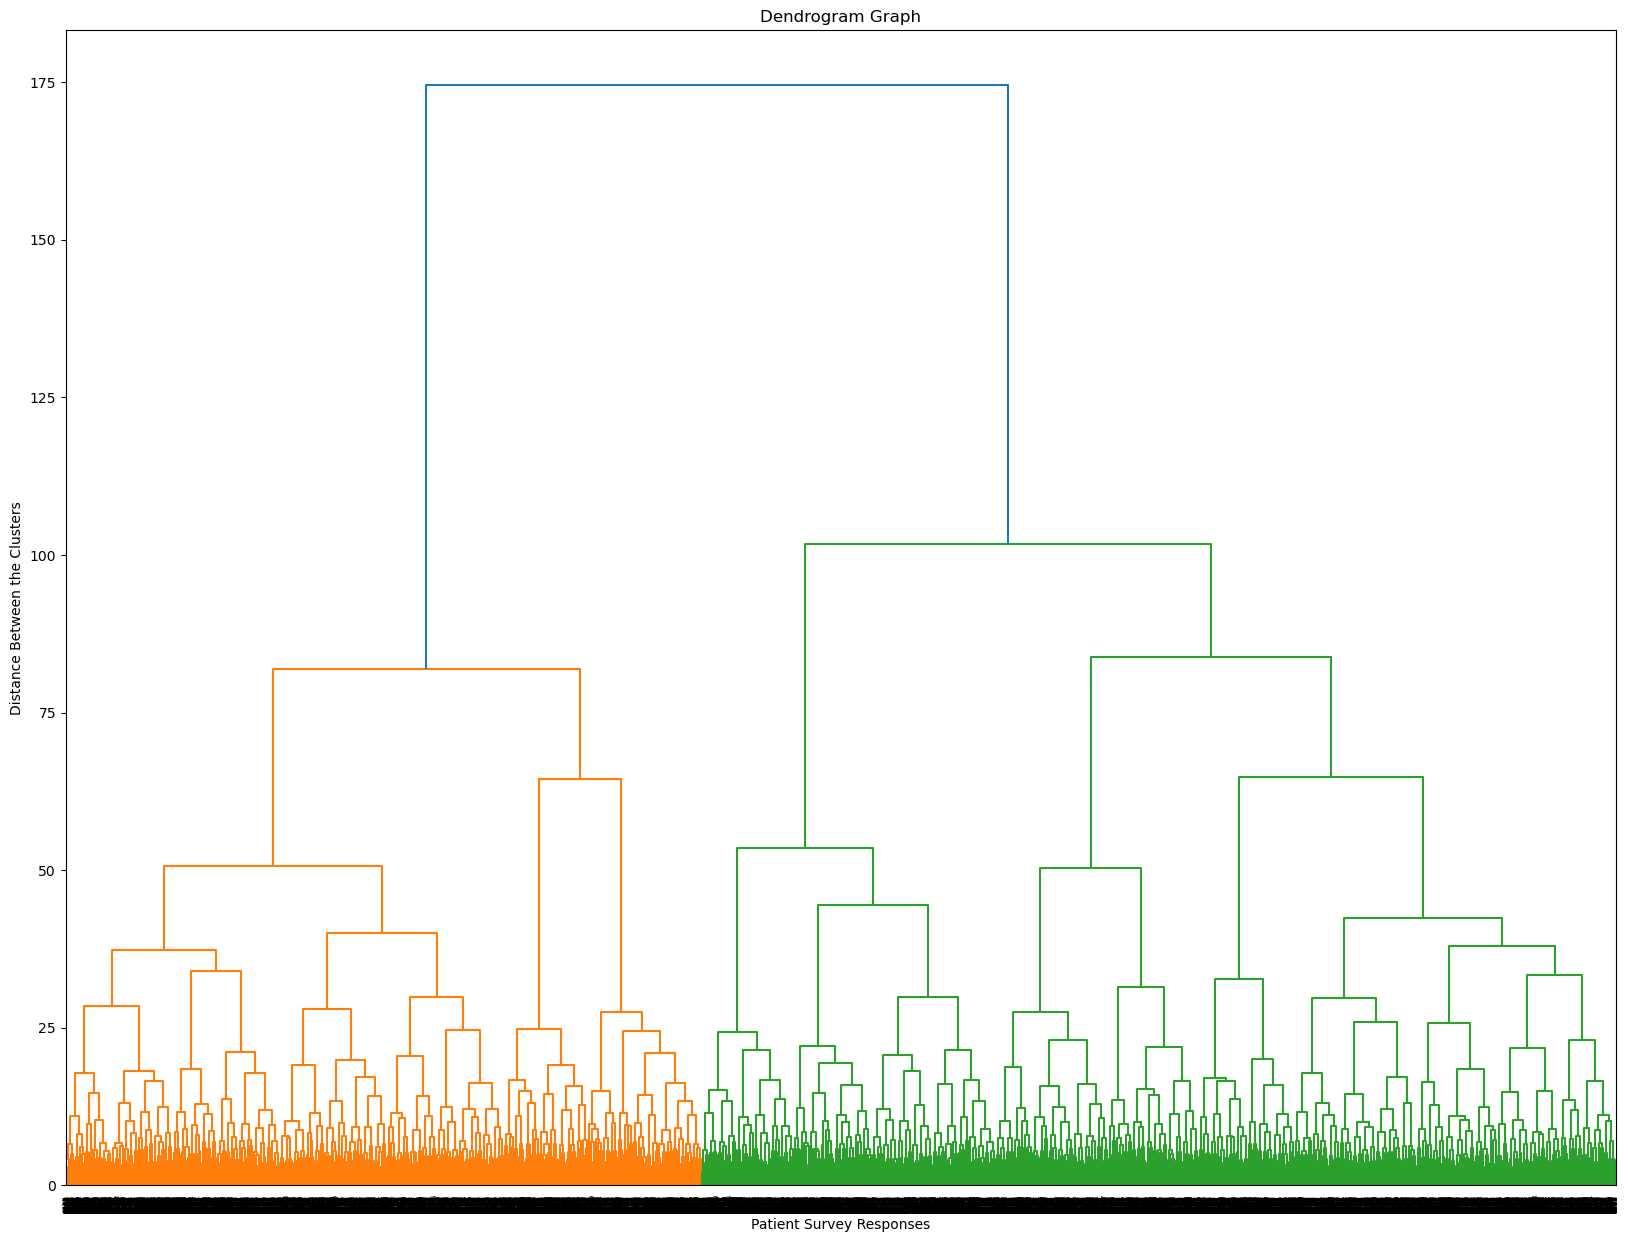

In [12]:
# Visualize the model using a dendrogram. (tree visual).
plt.figure(figsize=[20, 15])
ward_dendro = dendrogram(ward_matrix_arr)

# Set up the plot labels.
plt.title("Dendrogram Graph")
plt.xlabel("Patient Survey Responses")
plt.ylabel("Distance Between the Clusters")

# Show the dendrogram graph.
plt.show()

Using fcluster() method to see the clustering size.

In [13]:
medical_df["Cluster Labels"] = fcluster(ward_matrix_arr, 2, criterion='maxclust')
print(medical_df["Cluster Labels"].value_counts().sort_index())

1    4105
2    5895
Name: Cluster Labels, dtype: int64


## A look at the distibution of the answers by cluster
This will show a visualiztion of how the patients are distributed among the clusters and the questions. It was noted in a previous assessment (D 205) that the average for all questions was approximately between 5 and 6. The visuals below show this to be true.  There hasn't been a change in the data from D205 Data Acquisition. All surveys qustions seem to be equally important when looked at in aggreagate. 

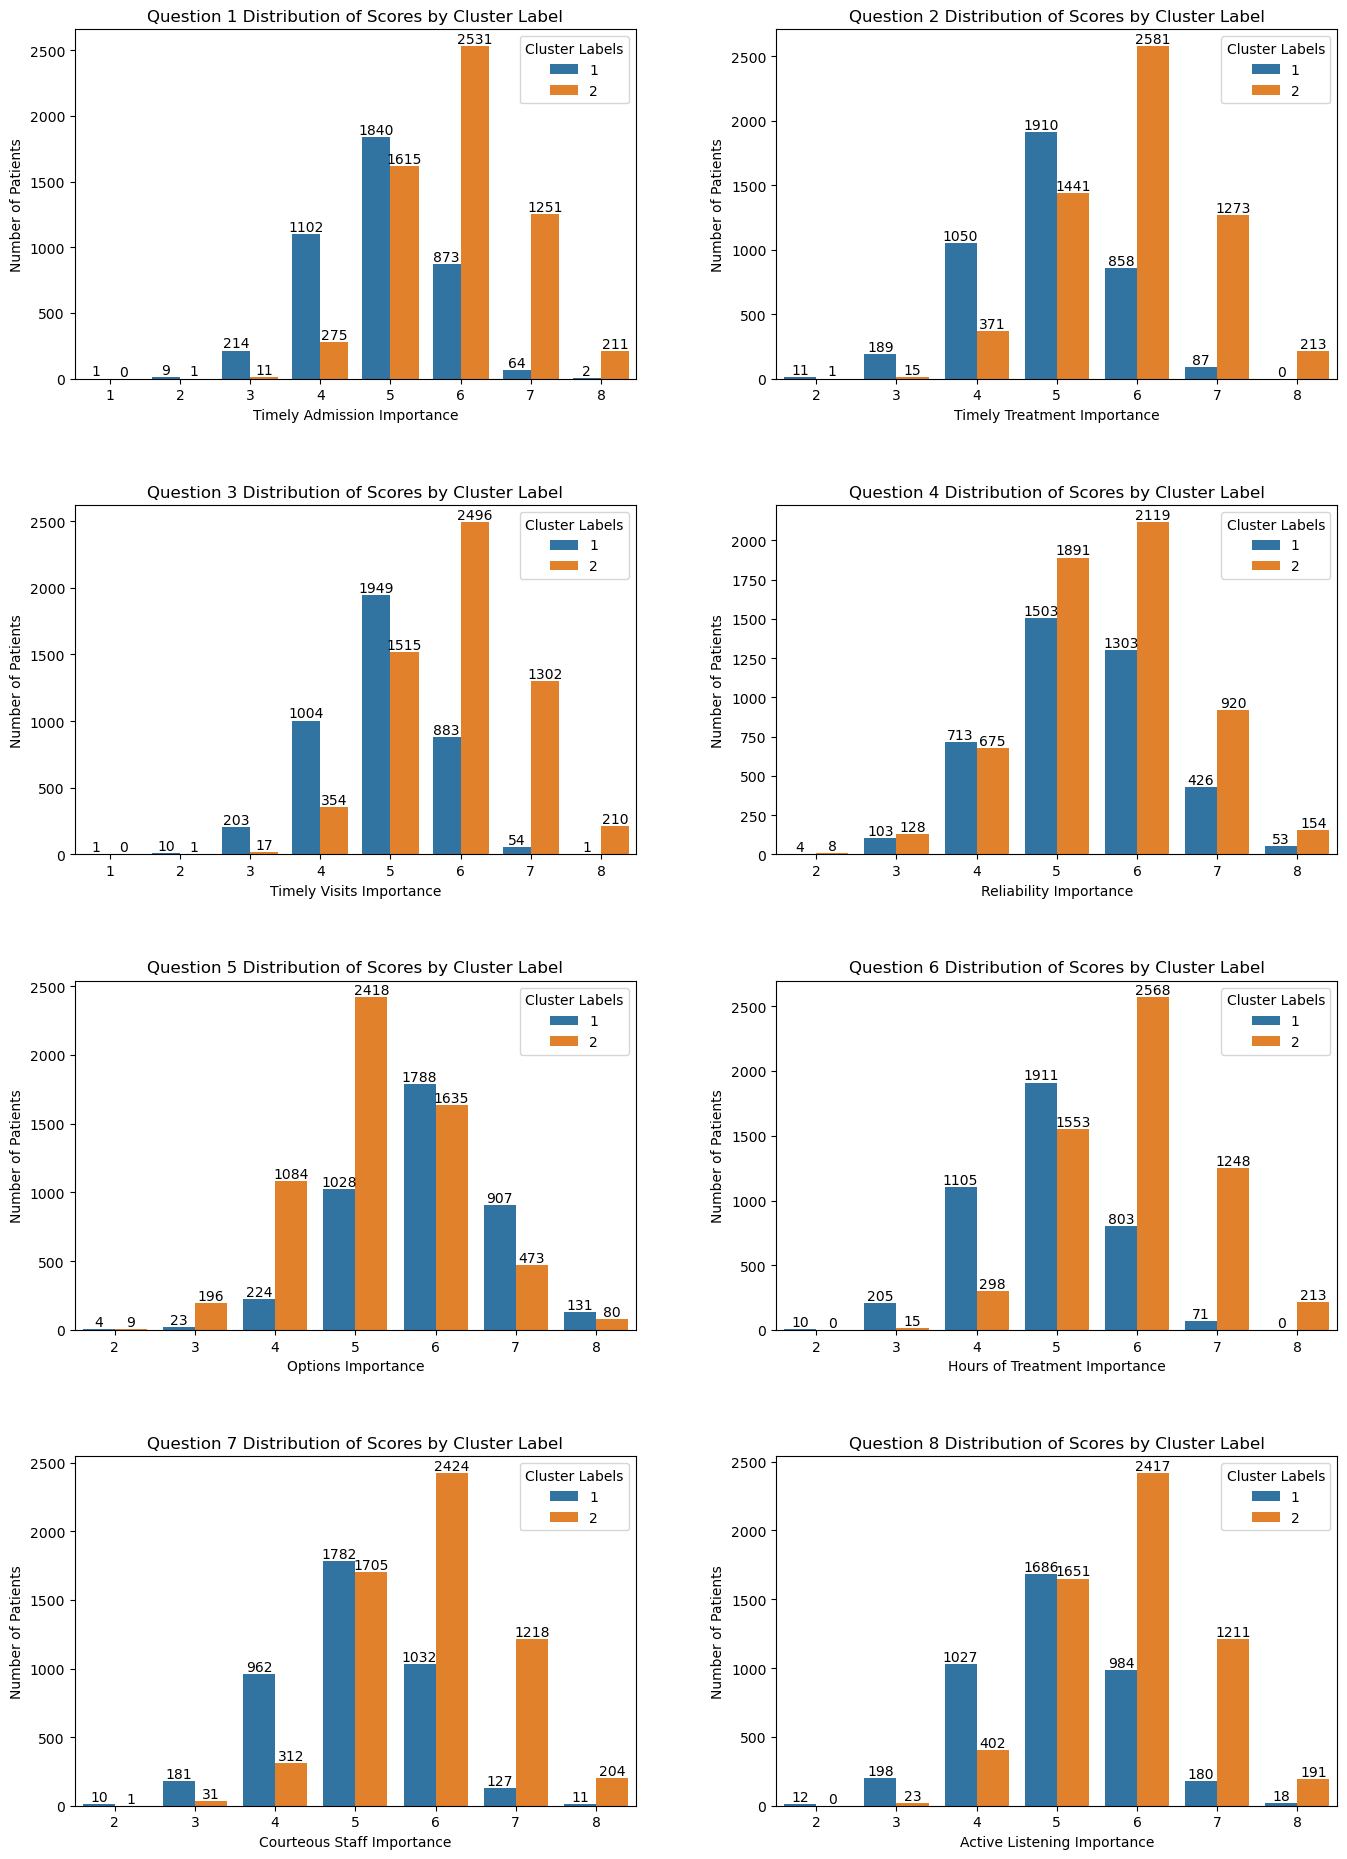

In [14]:
# Visualizing the distribution of the answers to the answers to the questions.

fig, axs = plt.subplots(figsize=(15,20),nrows=4, ncols=2, sharex=False
                        , sharey=False)

fig.tight_layout(pad=7.0)

# Question 1
sns.countplot(data=medical_df, x="timely_admis_surv", ax=axs[0,0]
              , hue="Cluster Labels").set(xlabel="Timely Admission Importance"
                                          , ylabel="Number of Patients"
                                          , title="Question 1 Distribution of Scores by Cluster Label")
axs[0,0].bar_label(axs[0,0].containers[0])
axs[0,0].bar_label(axs[0,0].containers[1])

# Question 2
sns.countplot(data=medical_df, x="timely_treatment_surv", ax=axs[0,1]
              , hue="Cluster Labels").set(xlabel="Timely Treatment Importance"
                                          , ylabel="Number of Patients"
                                          , title="Question 2 Distribution of Scores by Cluster Label")
axs[0,1].bar_label(axs[0,1].containers[0])
axs[0,1].bar_label(axs[0,1].containers[1])

# Question 3
sns.countplot(data=medical_df, x="timely_visits_surv", ax=axs[1,0]
              , hue="Cluster Labels").set(xlabel="Timely Visits Importance"
                                          , ylabel="Number of Patients"
                                          , title="Question 3 Distribution of Scores by Cluster Label") 
axs[1,0].bar_label(axs[1,0].containers[0])
axs[1,0].bar_label(axs[1,0].containers[1])           

# Question 4
sns.countplot(data=medical_df, x="reliability_surv", ax=axs[1,1]
              , hue="Cluster Labels").set(xlabel="Reliability Importance"
                                          , ylabel="Number of Patients"
                                          , title="Question 4 Distribution of Scores by Cluster Label") 
axs[1,1].bar_label(axs[1,1].containers[0])
axs[1,1].bar_label(axs[1,1].containers[1])
                                          
# Question 5
sns.countplot(data=medical_df, x="options_surv", ax=axs[2,0]
              , hue="Cluster Labels").set(xlabel="Options Importance"
                                          , ylabel="Number of Patients"
                                          , title="Question 5 Distribution of Scores by Cluster Label") 
axs[2,0].bar_label(axs[2,0].containers[0])
axs[2,0].bar_label(axs[2,0].containers[1])

# Question 6
sns.countplot(data=medical_df, x="hours_of_treatment_surv", ax=axs[2,1]
              , hue="Cluster Labels").set(xlabel="Hours of Treatment Importance"
                                          , ylabel="Number of Patients"
                                          , title="Question 6 Distribution of Scores by Cluster Label")  
axs[2,1].bar_label(axs[2,1].containers[0])
axs[2,1].bar_label(axs[2,1].containers[1])                                         

# Question 7
sns.countplot(data=medical_df, x="courteous_staff_surv", ax=axs[3,0]
              , hue="Cluster Labels").set(xlabel="Courteous Staff Importance"
                                          , ylabel="Number of Patients"
                                          , title="Question 7 Distribution of Scores by Cluster Label")  
axs[3,0].bar_label(axs[3,0].containers[0])
axs[3,0].bar_label(axs[3,0].containers[1])

# Question 8
sns.countplot(data=medical_df, x="active_listening_surv", ax=axs[3,1]
              , hue="Cluster Labels").set(xlabel="Active Listening Importance"
                                          , ylabel="Number of Patients"
                                          , title="Question 8 Distribution of Scores by Cluster Label")  
axs[3,1].bar_label(axs[3,1].containers[0])
axs[3,1].bar_label(axs[3,1].containers[1])                                          

plt.show()

# E1. Quality of the clusters

The quality of the clusters will be evaluated using a silhouette score or coefficients.  More about this concept can be found in Section E of the written document that accompanies this assessment.

Looking at the scores_df.  We can see that the quality of using two clusters is the best option.

In [15]:
#Print the datframe without the index.
scores_df.style.hide_index()

Number of Clusters,Silhouette Score
2,0.148369
3,0.082875
4,0.066284
5,0.056939
6,0.046459
7,0.043949
8,0.036552
9,0.035686
10,0.033872
11,0.031512


Looking at the scores_df. We can see that the quality of using two clusters is the best of the cluster.


In [16]:
# Print the silhouette score.
print("The silhouette score for {} clusters is {}".format(int(scores_df.iloc[0]["Number of Clusters"])
                                                           , round(scores_df.iloc[0]["Silhouette Score"]
                                                                   , 5)))

The silhouette score for 2 clusters is 0.14837
